In [ ]:
import os
import zipfile

!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip


zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

--2022-08-10 10:53:11--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 172.217.194.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  27.3MB/s    in 2.4s    

2022-08-10 10:53:15 (27.3 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import initializers

def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), data_format="channels_last", activation='relu', input_shape=(380, 380, 3)),
      #tf.keras.layers.BatchNormalization(axis=-1),
      tf.keras.layers.Dropout(0.01),
      tf.keras.layers.Conv2D(64, (3,3), data_format="channels_last", activation='relu'),
      tf.keras.layers.BatchNormalization(axis=-1),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(128, (3,3), data_format="channels_last", activation='relu'),
      #tf.keras.layers.BatchNormalization(axis=-1),
      tf.keras.layers.Dropout(0.02),
      tf.keras.layers.Conv2D(128, (3,3), data_format="channels_last", activation='relu'),
      tf.keras.layers.BatchNormalization(axis=-1),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(256, (3,3), data_format="channels_last", activation='relu'),
      #tf.keras.layers.BatchNormalization(axis=-1),
      tf.keras.layers.Dropout(0.03),
      tf.keras.layers.Conv2D(256, (3,3), data_format="channels_last", activation='relu'),
      tf.keras.layers.BatchNormalization(axis=-1),
      tf.keras.layers.MaxPooling2D(2,2),
      #tf.keras.layers.Conv2D(512, (3,3), data_format="channels_last", activation='relu'),
      tf.keras.layers.Conv2D(384, (3,3), data_format="channels_last", activation='relu'),
      #tf.keras.layers.BatchNormalization(axis=-1),
      tf.keras.layers.Dropout(0.04),
      #tf.keras.layers.Conv2D(512, (3,3), data_format="channels_last", activation='relu'),
      tf.keras.layers.Conv2D(384, (3,3), data_format="channels_last", activation='relu'),
      tf.keras.layers.BatchNormalization(axis=-1),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
#      tf.keras.layers.Conv2D(64, (3,3), data_format="channels_last", activation=tf.keras.layers.LeakyReLU(alpha=0.3)),
      #tf.keras.layers.Dropout(0.2),
      #tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dropout(0.08),
      #tf.keras.layers.Dense(1000, activation='relu', activity_regularizer=tf.keras.regularizers.L2(2e-5)),
      #tf.keras.layers.Dense(1000, activation='relu', activity_regularizer=tf.keras.regularizers.L2(1e-6)),
      #tf.keras.layers.Dense(1024, activation='relu'),
      #tf.keras.layers.Dense(512, activation='relu'),
      #tf.keras.layers.Dense(600, activation='relu', activity_regularizer=tf.keras.regularizers.L2(1e-4)),
      tf.keras.layers.Dense(600, activation='relu', activity_regularizer=tf.keras.regularizers.L2(2e-5)),
                                #tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(25, activation='relu', activity_regularizer=tf.keras.regularizers.L2(1e-7)),
                  #tf.keras.layers.Dense(71, activation='relu', activity_regularizer=tf.keras.regularizers.L2(2e-7)),
                  #tf.keras.layers.Dense(9, activation='relu'),
              #tf.keras.layers.BatchNormalization(scale=True, gamma_initializer=2),
              #initializer=tf.keras.initializers.Constant(2.),
              #tf.keras.layers.BatchNormalization(scale=True, gamma_initializer=initializer),
      #tf.keras.layers.Dense(1, activation='sigmoid')
      tf.keras.layers.Dense(2, activation='softmax')
  ])

  #model.compile(loss='binary_crossentropy',
  model.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                #optimizer=RMSprop(learning_rate=5e-5),
                #optimizer=RMSprop(learning_rate=1e-5),
                metrics=['accuracy'])
  
  return model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        #target_size=(188, 188),
        target_size=(380, 380),
        batch_size=20,
        #batch_size=100,
        #class_mode='binary')
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        #target_size=(188, 188),
        target_size=(380, 380),
        batch_size=20,
        #batch_size=100,
        #class_mode='binary')
        class_mode='categorical')

EPOCHS = 100

model_for_aug = create_model()

my_callbacks = [
                        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.4, patience=4, verbose=1, min_delta=0.0001, cooldown=0, min_lr=1e-6)
    #tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=7, verbose=1, min_delta=0.0001, cooldown=0, min_lr=2e-6)
    #tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=10, verbose=1, min_delta=0.0001, cooldown=0, min_lr=2e-6)
]

history_1 = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,
      #steps_per_epoch=20,
      epochs=EPOCHS,
      callbacks=my_callbacks,
      validation_data=validation_generator,
      validation_steps=50,
      #validation_steps=10,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 113s - loss: 1.2102 - accuracy: 0.5575 - val_loss: 4.9089 - val_accuracy: 0.5000 - lr: 1.0000e-04 - 113s/epoch - 1s/step
Epoch 2/100
100/100 - 98s - loss: 0.7710 - accuracy: 0.5650 - val_loss: 3.6212 - val_accuracy: 0.5000 - lr: 1.0000e-04 - 98s/epoch - 983ms/step
Epoch 3/100
100/100 - 100s - loss: 0.7705 - accuracy: 0.5880 - val_loss: 7.1963 - val_accuracy: 0.5000 - lr: 1.0000e-04 - 100s/epoch - 999ms/step
Epoch 4/100
100/100 - 99s - loss: 0.8673 - accuracy: 0.6050 - val_loss: 34.9568 - val_accuracy: 0.5000 - lr: 1.0000e-04 - 99s/epoch - 993ms/step
Epoch 5/100

Epoch 5: ReduceLROnPlateau reducing learning rate to 3.9999998989515007e-05.
100/100 - 98s - loss: 0.8739 - accuracy: 0.6250 - val_loss: 152.0877 - val_accuracy: 0.5000 - lr: 1.0000e-04 - 98s/epoch - 984ms/step
Epoch 6/100
100/100 - 98s - loss: 0.6771 - accuracy: 0.6400 - val_loss: 8.1057 - val_accuracy: 0.5370 - lr: 4.0000

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

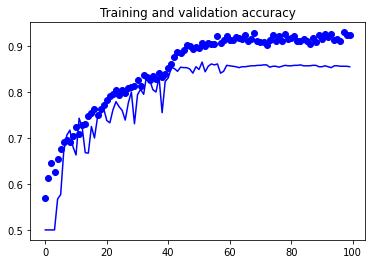

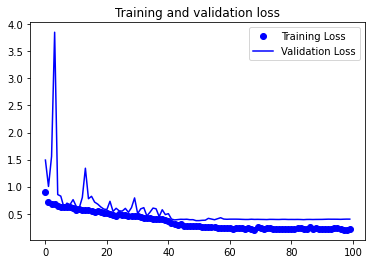

In [ ]:
  plot_loss_acc(history_1)